<a href="https://colab.research.google.com/github/vsun1020/portfolio_projects/blob/main/statistics_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import models

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [24]:
#creating dataset

df = pd.DataFrame({'movie': ['a', 'b', 'c', 'a', 'b', 'c', 'a', 'b', 'c'],
'rating':[9,7,6,9,5,7,8,9,5]})

In [4]:
#since I only have one feature, this script is enough to look at mean
df.mean()

<ipython-input-4-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


rating    7.222222
dtype: float64

In [5]:
#if i had more than one feature:

df.rating.mean()

7.222222222222222

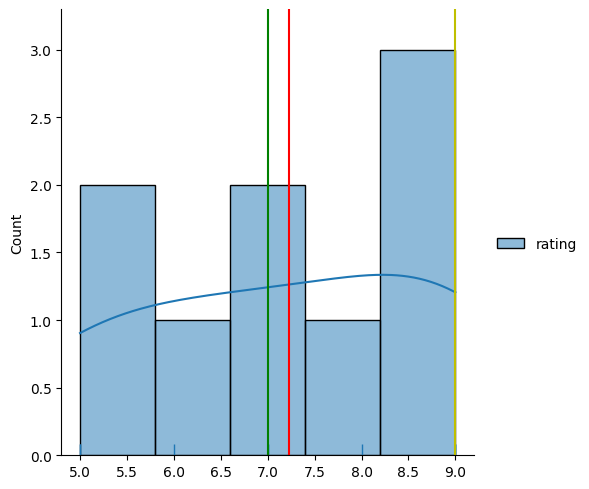

In [9]:
#visualizing measures of central tendency

sns.displot(df, kde=True, rug=True)
plt.axvline(np.mean(df.rating), color='r', linestyle='-')
plt.axvline(np.median(df.rating), color='g', linestyle='-')
plt.axvline(df.rating.mode().values[0], color='y', linestyle='-')

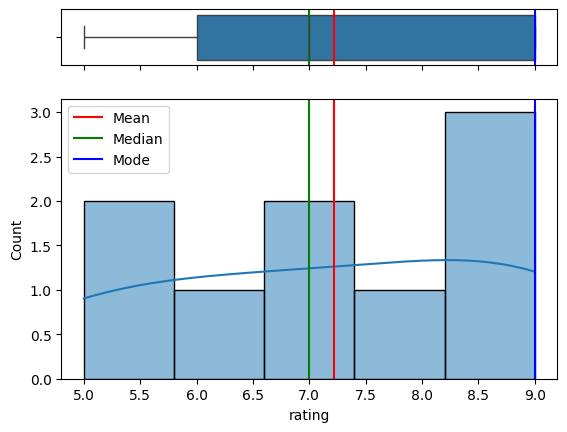

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True,
                                    gridspec_kw={'height_ratios':(0.2, 1)})

mean = np.mean(df.rating)
median = np.median(df.rating)
mode = df.rating.mode().values[0]

sns.boxplot(data=df, x='rating', ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='-')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x='rating', ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='-', label='Mean')
ax_hist.axvline(median, color='g', linestyle='-', label='Median')
ax_hist.axvline(mode, color='b', linestyle='-', label='Mode')

ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

In [17]:
df.rating.var()

2.6944444444444446

In [18]:
df.rating.std()

1.6414763002993509

In [21]:
mean = df.groupby(['movie'])['rating'].mean()
std = df.groupby(['movie'])['rating'].std()

mean

movie
a    8.666667
b    7.000000
c    6.000000
Name: rating, dtype: float64

In [22]:
std

movie
a    0.57735
b    2.00000
c    1.00000
Name: rating, dtype: float64

<Axes: xlabel='movie'>

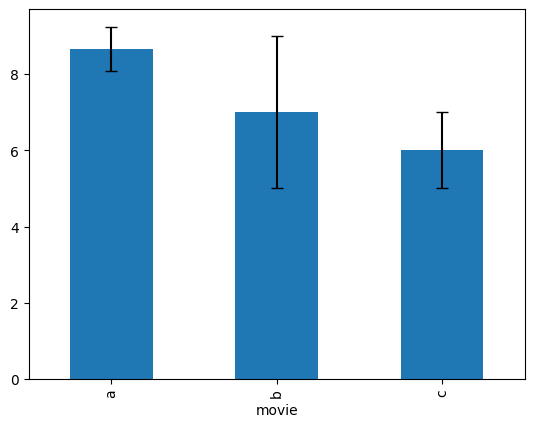

In [23]:
fig, ax = plt.subplots()
mean.plot.bar(yerr=std, ax=ax, capsize=4)